## Using information gain for feature selection for classification

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif, SelectKBest
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://gist.githubusercontent.com/tijptjik/9408623/raw/b237fa5848349a14a14e5d4107dc7897c21951f5/wine.csv')

In [3]:
df.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Wine                  178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic.acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Acl                   178 non-null    float64
 5   Mg                    178 non-null    int64  
 6   Phenols               178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid.phenols  178 non-null    float64
 9   Proanth               178 non-null    float64
 10  Color.int             178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD                    178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [5]:
df.isna().sum().any()

False

In [6]:
df['Wine'].unique()

array([1, 2, 3])

In [7]:
x = df.drop('Wine', axis=1)
y = df['Wine']
print(x.shape, y.shape)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

(178, 13) (178,)


### Using mutual_info_classif from sklearn.feature_selection 

In [8]:
mutual_info = mutual_info_classif(x_train, y_train)

In [9]:
mutual_info

array([0.4457448 , 0.26654041, 0.11499078, 0.27415434, 0.25514332,
       0.41555141, 0.70012787, 0.14546221, 0.27289342, 0.5507199 ,
       0.42036734, 0.50985894, 0.63604739])

In [10]:
x.columns

Index(['Alcohol', 'Malic.acid', 'Ash', 'Acl', 'Mg', 'Phenols', 'Flavanoids',
       'Nonflavanoid.phenols', 'Proanth', 'Color.int', 'Hue', 'OD', 'Proline'],
      dtype='object')

In [11]:
m_info = pd.Series(mutual_info)
m_info.index = x.columns
m_info.sort_values(ascending=False)

Flavanoids              0.700128
Proline                 0.636047
Color.int               0.550720
OD                      0.509859
Alcohol                 0.445745
Hue                     0.420367
Phenols                 0.415551
Acl                     0.274154
Proanth                 0.272893
Malic.acid              0.266540
Mg                      0.255143
Nonflavanoid.phenols    0.145462
Ash                     0.114991
dtype: float64

<AxesSubplot:>

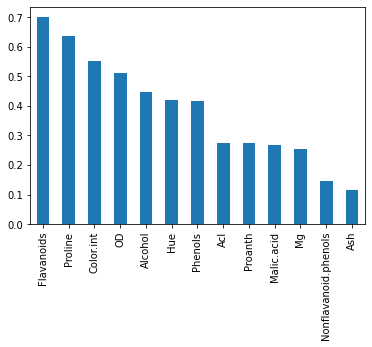

In [12]:
m_info.sort_values(ascending=False).plot.bar()

In [13]:
m_info.index[:10].values

array(['Alcohol', 'Malic.acid', 'Ash', 'Acl', 'Mg', 'Phenols',
       'Flavanoids', 'Nonflavanoid.phenols', 'Proanth', 'Color.int'],
      dtype=object)

In [14]:
x[m_info.index[:10].values] # manually picking the top 10 vaiables interms of information gain

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32
...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30


### Using SelectKBest (which here it is again based on information gain) from sklearn.feature_selection

In [15]:
selectTopK = SelectKBest(mutual_info_classif, k=10)
selectTopK.fit(x_train, y_train)
selectTopK.get_support()

array([ True,  True, False,  True, False,  True,  True, False,  True,
        True,  True,  True,  True])

In [16]:
x[x.columns[selectTopK.get_support()]]

,Alcohol,Malic.acid,Acl,Phenols,Flavanoids,Proanth,Color.int,Hue,OD,Proline
0,14.23,1.71,15.6,2.80,3.06,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,11.2,2.65,2.76,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,18.6,2.80,3.24,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,16.8,3.85,3.49,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,21.0,2.80,2.69,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,20.5,1.68,0.61,1.06,7.70,0.64,1.74,740
174,13.40,3.91,23.0,1.80,0.75,1.41,7.30,0.70,1.56,750
175,13.27,4.28,20.0,1.59,0.69,1.35,10.20,0.59,1.56,835
176,13.17,2.59,20.0,1.65,0.68,1.46,9.30,0.60,1.62,840


## Using information gain for feature selection for regression

In [17]:
from sklearn.feature_selection import mutual_info_regression, SelectPercentile

In [18]:
df_housing = pd.read_csv('data/housing_data.csv')

In [19]:
df_housing.shape

(1460, 81)

In [20]:
df_housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [21]:
df_housing.isna().sum().any()

True

In [22]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [23]:
# looking at the result for info we have so many missing values for Alley, PoolQC, Fence, MiscFeature -> so I will drop them as well as dropping id
print(f'Before dropping columns with too many NANs the shape is {df_housing.shape}')
to_drop = ['Alley', 'PoolQC', 'Fence', 'MiscFeature', 'Id']
df_housing.drop(to_drop, axis=1, inplace=True)
print(f'After dropping columns with too many NANs the shape is {df_housing.shape}')

Before dropping columns with too many NANs the shape is (1460, 81)
After dropping columns with too many NANs the shape is (1460, 76)


In [24]:
df_housing_numerical = df_housing.select_dtypes(exclude='object')

In [25]:
df_housing_numerical.shape

(1460, 37)

In [26]:
x_housing_train, x_housing_test, y_housing_train, y_housing_test = train_test_split(df_housing_numerical.drop('SalePrice', axis=1), df_housing_numerical['SalePrice'], test_size=0.3)

In [27]:
mutual_info_reg = mutual_info_regression(x_housing_train.fillna(0), y_housing_train)
mutual_info_reg

array([2.84137966e-01, 1.70859290e-01, 1.70263644e-01, 5.81533379e-01,
       1.10789474e-01, 3.85073437e-01, 2.83122400e-01, 1.18376237e-01,
       1.92686783e-01, 1.22359596e-02, 1.31440675e-01, 3.97061239e-01,
       3.27373985e-01, 2.18268576e-01, 0.00000000e+00, 5.16478278e-01,
       2.65261229e-02, 0.00000000e+00, 2.90898883e-01, 7.95565109e-02,
       7.08828098e-02, 1.07953830e-04, 1.99648456e-01, 1.69852113e-01,
       2.67666404e-01, 3.64034777e-01, 3.28598868e-01, 1.08064541e-01,
       1.76089669e-01, 3.43548262e-02, 9.68029756e-03, 7.57621928e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.00305713e-03])

In [28]:
mutual_info_reg = pd.Series(mutual_info_reg)
mutual_info_reg.index = x_housing_train.columns
top10 = mutual_info_reg.sort_values(ascending=False)[:10]

<AxesSubplot:>

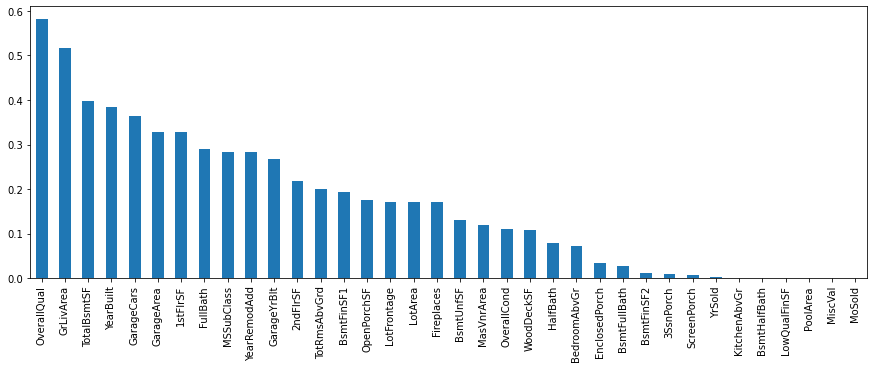

In [29]:
mutual_info_reg.sort_values(ascending=False).plot.bar(figsize=(15,5))

In [30]:
x_housing_train_top10_features = x_housing_train[top10.index.values]

In [31]:
x_housing_train_top10_features.shape

(1022, 10)

In [32]:
x_housing_train_top10_features.head()

,OverallQual,GrLivArea,TotalBsmtSF,YearBuilt,GarageCars,GarageArea,1stFlrSF,FullBath,MSSubClass,YearRemodAdd
479,4,1131,907,1937,2,672,1131,1,30,2000
916,2,480,480,1949,1,308,480,0,20,1950
1027,8,1646,1638,2007,3,800,1646,2,20,2008
781,6,1603,761,1992,2,484,810,2,60,1992
1416,4,2290,777,1885,2,560,1246,2,190,1950


### Using SelectKBest (which here it is again based on information gain) from sklearn.feature_selection

In [33]:
selectTopPercentile = SelectPercentile(mutual_info_regression, percentile=20)
x_housing_train_percentile_selected_features = selectTopPercentile.fit_transform(x_housing_train.fillna(0), y_housing_train)

In [34]:
x_housing_train_percentile_selected_features.shape

(1022, 7)

In [35]:
x_housing_train_percentile_selected_features

array([[4.000e+00, 1.937e+03, 9.070e+02, ..., 1.131e+03, 2.000e+00,
        6.720e+02],
       [2.000e+00, 1.949e+03, 4.800e+02, ..., 4.800e+02, 1.000e+00,
        3.080e+02],
       [8.000e+00, 2.007e+03, 1.638e+03, ..., 1.646e+03, 3.000e+00,
        8.000e+02],
       ...,
       [5.000e+00, 1.976e+03, 2.640e+02, ..., 1.304e+03, 1.000e+00,
        3.360e+02],
       [4.000e+00, 1.925e+03, 7.800e+02, ..., 1.208e+03, 2.000e+00,
        5.390e+02],
       [6.000e+00, 1.950e+03, 1.032e+03, ..., 1.252e+03, 1.000e+00,
        2.880e+02]])

In [36]:
selectTopPercentile = SelectPercentile(mutual_info_regression, percentile=20)
selectTopPercentile.fit(x_housing_train.fillna(0), y_housing_train)
x_housing_train[x_housing_train.columns[selectTopPercentile.get_support()]]

,OverallQual,YearBuilt,TotalBsmtSF,1stFlrSF,GrLivArea,GarageCars,GarageArea
479,4,1937,907,1131,1131,2,672
916,2,1949,480,480,480,1,308
1027,8,2007,1638,1646,1646,3,800
781,6,1992,761,810,1603,2,484
1416,4,1885,777,1246,2290,2,560
...,...,...,...,...,...,...,...
188,5,1979,1086,1224,1224,2,528
372,6,1984,744,752,752,1,264
490,5,1976,264,616,1304,1,336
729,4,1925,780,848,1208,2,539


## Using chi2 for feature selection

In [37]:
from sklearn.feature_selection import chi2

In [38]:
titanic = sns.load_dataset('titanic')

In [39]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [40]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [41]:
titanic_categorical = titanic.select_dtypes(include=['object', 'bool'])

In [42]:
titanic_categorical['target'] = titanic['survived']

In [43]:
titanic_categorical.head()

,sex,embarked,who,adult_male,embark_town,alive,alone,target
0,male,S,man,True,Southampton,no,False,0
1,female,C,woman,False,Cherbourg,yes,False,1
2,female,S,woman,False,Southampton,yes,True,1
3,female,S,woman,False,Southampton,yes,False,1
4,male,S,man,True,Southampton,no,True,0


In [44]:
# for chi2 we have to label encode all of the categorical features
from sklearn.preprocessing import LabelEncoder

In [45]:
label_encoder = LabelEncoder()
columns = titanic_categorical.columns
for col in columns:
    titanic_categorical[col] = label_encoder.fit_transform(titanic_categorical[col])

In [46]:
titanic_categorical

,sex,embarked,who,adult_male,embark_town,alive,alone,target
0,1,2,1,1,2,0,0,0
1,0,0,2,0,0,1,0,1
2,0,2,2,0,2,1,1,1
3,0,2,2,0,2,1,0,1
4,1,2,1,1,2,0,1,0
...,...,...,...,...,...,...,...,...
886,1,2,1,1,2,0,1,0
887,0,2,2,0,2,1,1,1
888,0,2,2,0,2,0,0,0
889,1,0,1,1,0,1,1,1


In [47]:
titanic_categorical['embarked'].unique()

array([2, 0, 1, 3])

In [48]:
titanic_categorical.isna().sum().any()

False

In [49]:
x_titanic_train, x_titanic_test, y_titanic_train, y_titanic_test = train_test_split(titanic_categorical.drop('target', axis=1), titanic_categorical['target'], test_size=0.3)

In [50]:
f_p_scores = chi2(x_titanic_train, y_titanic_train)
# chi2 returns Chi2 statistics and p-values for each feature. The higher the chi2-statistic=f-score is and the lower the p-value is for a given feature, the more important that feature is

In [51]:
f_p_scores

(array([ 67.76987704,   9.39385931,  19.81944607,  82.75625804,
          9.39385931, 391.        ,  13.93758634]),
 array([1.83735180e-16, 2.17713419e-03, 8.51123589e-06, 9.28214781e-20,
        2.17713419e-03, 5.01391257e-87, 1.88981494e-04]))

In [52]:
chi_p_values = pd.Series(f_p_scores[1]) # only looking at the p-values
chi_p_values.index = x_titanic_train.columns
chi_p_values.sort_values(ascending=True)

alive          5.013913e-87
adult_male     9.282148e-20
sex            1.837352e-16
who            8.511236e-06
alone          1.889815e-04
embarked       2.177134e-03
embark_town    2.177134e-03
dtype: float64

In [53]:
chi_f_scores = pd.Series(f_p_scores[0]) # only looking at the f-scores
chi_f_scores.index = x_titanic_train.columns
chi_f_scores.sort_values(ascending=False)

alive          391.000000
adult_male      82.756258
sex             67.769877
who             19.819446
alone           13.937586
embarked         9.393859
embark_town      9.393859
dtype: float64

<AxesSubplot:xlabel='alive', ylabel='target'>

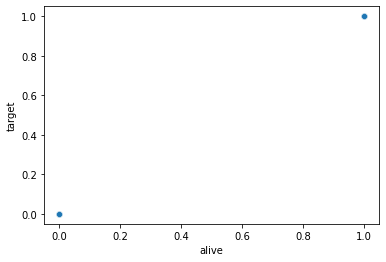

In [59]:
sns.scatterplot(x = x_titanic_train['alive'], y=y_titanic_train)

<AxesSubplot:>

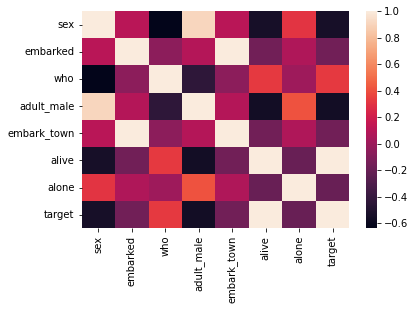

In [60]:
sns.heatmap(titanic_categorical.corr())

#### Looks like the precence of 'alive' results in info leakage because it is basically the same as th etarget variable

In [66]:
## After the categorical variables have been encoded, we could use mudual_info_classif too
mi = mutual_info_classif(x_titanic_train, y_titanic_train)
mi = pd.Series(mi)
mi.index = x_titanic_train.columns
mi.sort_values(ascending=False)

alive          0.661020
adult_male     0.182930
who            0.170056
sex            0.161745
alone          0.028919
embarked       0.025831
embark_town    0.000000
dtype: float64